Q-learning is an off policy reinforcement learning algorithm that seeks to find the best action to take given the current state. It’s considered off-policy because the q-learning function learns from actions that are outside the current policy, like taking random actions, and therefore a policy isn’t needed. More specifically, q-learning seeks to learn a policy that maximizes the total reward.

## 1st Example

In [1]:
import numpy as np
import gym
import random

env = gym.make("Taxi-v2")
env.render()


/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [2]:
action_size = env.action_space.n
print("Action size ", action_size)

state_size = env.observation_space.n
print("State size ", state_size)

qtable = np.zeros((state_size, action_size))
print('qtable:', qtable.shape)

Action size  6
State size  500
qtable: (500, 6)


In [3]:
total_episodes = 50000        # Total episodes
total_test_episodes = 100     # Total test episodes
max_steps = 99    #99            # Max steps per episode

learning_rate = 0.7           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.01             # Exponential decay rate for exploration prob

In [4]:
# 2 For life or until learning is stopped
for episode in range(total_episodes):
#for episode in range(2):

    # Reset the environment
    state = env.reset()
    #print('episode:', episode)
    #print('state:', state)
    step = 0
    done = False

    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0,1)

        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma *
                                    np.max(qtable[new_state, :]) - qtable[state, action])
        
        #print('\nqtable:',qtable)

        # Our new state is state
        state = new_state

        # If done : finish episode
        if done == True:
            break

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)

In [5]:
env.reset()
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(max_steps):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        # env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])

        new_state, reward, done, info = env.step(action)

        total_rewards += reward

        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

Score over time: 8.45


## 2st Example

In [6]:
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
class GridWorld:
    ## Initialise starting data
    def __init__(self):
        # Set information about the gridworld
        self.height = 5
        self.width = 5
        self.grid = np.zeros(( self.height, self.width)) - 1
        
        # Set random start location for the agent
        self.current_location = ( 4, np.random.randint(0,5))
        
        # Set locations for the bomb and the gold
        self.bomb_location = (1,3)
        self.gold_location = (0,3)
        self.terminal_states = [ self.bomb_location, self.gold_location]
        
        # Set grid rewards for special cells
        self.grid[ self.bomb_location[0], self.bomb_location[1]] = -10
        self.grid[ self.gold_location[0], self.gold_location[1]] = 10
        
        # Set available actions
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
    
        
    ## Put methods here:
    def get_available_actions(self):
        """Returns possible actions"""
        return self.actions
    
    def agent_on_map(self):
        """Prints out current location of the agent on the grid (used for debugging)"""
        grid = np.zeros(( self.height, self.width))
        grid[ self.current_location[0], self.current_location[1]] = 1
        return grid
    
    def get_reward(self, new_location):
        """Returns the reward for an input position"""
        return self.grid[ new_location[0], new_location[1]]
        
    
    def make_step(self, action):
        """Moves the agent in the specified direction. If agent is at a border, agent stays still
        but takes negative reward. Function returns the reward for the move."""
        # Store previous location
        last_location = self.current_location
        
        # UP
        if action == 'UP':
            # If agent is at the top, stay still, collect reward
            if last_location[0] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
        
        # DOWN
        elif action == 'DOWN':
            # If agent is at bottom, stay still, collect reward
            if last_location[0] == self.height - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
            
        # LEFT
        elif action == 'LEFT':
            # If agent is at the left, stay still, collect reward
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)

        # RIGHT
        elif action == 'RIGHT':
            # If agent is at the right, stay still, collect reward
            if last_location[1] == self.width - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)
                
        return reward
    
    def check_state(self):
        """Check if the agent is in a terminal state (gold or bomb), if so return 'TERMINAL'"""
        if self.current_location in self.terminal_states:
            return 'TERMINAL'

In [8]:
class Q_Agent():
    # Intialise
    def __init__(self, environment, epsilon=0.05, alpha=0.1, gamma=1):
        self.environment = environment
        self.q_table = dict() # Store all Q-values in dictionary of dictionaries 
        for x in range(environment.height): # Loop through all possible grid spaces, create sub-dictionary for each
            for y in range(environment.width):
                self.q_table[(x,y)] = {'UP':0, 'DOWN':0, 'LEFT':0, 'RIGHT':0} # Populate sub-dictionary with zero values for possible moves

        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        
    def choose_action(self, available_actions):
        """Returns the optimal action from Q-Value table. If multiple optimal actions, chooses random choice.
        Will make an exploratory random action dependent on epsilon."""
        if np.random.uniform(0,1) < self.epsilon:
            action = available_actions[np.random.randint(0, len(available_actions))]
        else:
            q_values_of_state = self.q_table[self.environment.current_location]
            maxValue = max(q_values_of_state.values())
            action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])
        
        return action
    
    def learn(self, old_state, reward, new_state, action):
        """Updates the Q-value table using Q-learning"""
        q_values_of_state = self.q_table[new_state]
        max_q_value_in_new_state = max(q_values_of_state.values())
        current_q_value = self.q_table[old_state][action]
        
        self.q_table[old_state][action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * max_q_value_in_new_state)
        #return self.q_table

In [9]:
def play(environment, agent, trials=500, max_steps_per_episode=1000, learn=False):
#def play(environment, agent, trials=2, max_steps_per_episode=3, learn=False):
    print(learn)
    """The play function runs iterations and updates Q-values if desired."""
    reward_per_episode = [] # Initialise performance log
    
    for trial in range(trials): # Run trials
        cumulative_reward = 0 # Initialise values of each game
        step = 0
        game_over = False
        while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished
            old_state = environment.current_location
            action = agent.choose_action(environment.actions) 
            reward = environment.make_step(action)
            new_state = environment.current_location
            
            if learn == True: # Update Q-values if learning is specified
                agent.learn(old_state, reward, new_state, action)
                #print('r:',r)
                
            cumulative_reward += reward
            step += 1
            
            if environment.check_state() == 'TERMINAL': # If game is in terminal state, game over and start next trial
                environment.__init__()
                game_over = True     
                
        reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log
        
    return reward_per_episode # Return performance log

In [10]:
env = GridWorld()
agent = Q_Agent(env)

print("Current position of the agent =", env.current_location)
print(env.agent_on_map())
available_actions = env.get_available_actions()
print("Available_actions =", available_actions)
chosen_action = agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)
reward = env.make_step(chosen_action)
print("Reward obtained =", reward)
print("Current position of the agent =", env.current_location)
print(env.agent_on_map())

Current position of the agent = (4, 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
Available_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
Randomly chosen action = RIGHT
Reward obtained = -1.0
Current position of the agent = (4, 2)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


True


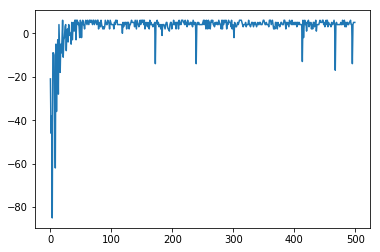

In [11]:
# Note the learn=True argument!
reward_per_episode = play(env, agent, trials=500, learn=True)

# Simple learning curve
plt.plot(reward_per_episode)

In [13]:
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            pretty(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))


pretty(agent.q_table)

(1, 2)
	UP
		8.999999999999982
	RIGHT
		-4.0951
	LEFT
		-0.3727996313046343
	DOWN
		2.731673486406832
(3, 2)
	UP
		6.9999999999999725
	RIGHT
		-0.7668211438659766
	LEFT
		0.36207953247396013
	DOWN
		2.2884586987655346
(0, 0)
	UP
		-0.30000000000000004
	RIGHT
		-0.08235005464377529
	LEFT
		-0.30000000000000004
	DOWN
		-0.327
(3, 0)
	UP
		-1.1704720316019046
	RIGHT
		-1.1539132418479565
	LEFT
		-1.2000000000000006
	DOWN
		-1.1202096379344613
(0, 4)
	UP
		0.081
	RIGHT
		0.4225795110000001
	LEFT
		7.458134171671
	DOWN
		-0.11000000000000001
(1, 4)
	UP
		3.015318121967611
	RIGHT
		-0.18725887900000002
	LEFT
		-1.0
	DOWN
		-0.22900000000000004
(1, 3)
	UP
		0
	RIGHT
		0
	LEFT
		0
	DOWN
		0
(2, 3)
	UP
		-1.9
	RIGHT
		-0.6678937100000001
	LEFT
		4.531116732085034
	DOWN
		-0.78264611378
(2, 1)
	UP
		-0.5967730752909154
	RIGHT
		2.5804741593780327
	LEFT
		-0.7216045900000001
	DOWN
		-0.6723635687000001
(2, 4)
	UP
		0.10875870731685436
	RIGHT
		-0.7000000000000002
	LEFT
		-0.6077461900000001
	DOWN